# EXTRA CREDIT HOMEWORK 

In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal
import seaborn as sns; sns.set()
from demo import fairness_demo

/Users/arp504/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Problem 1  [25 points]
Consider the four datasets returned from the function get_dataset($d$) for $d=2,3,4, \& \;5$. Here $d$ is the dimensionality of the non-sensitive covariates, which are returned in the matrix $X$, whereas the vectors $y$ and $x_{\rm{sensitive}}$ store the target labels and sensitive covariate, respectively. (As such the structure of the data is exactly analagous to what we have in the fairness demo notebook from the lecture.)

In [21]:
def get_gaussian_data(mean, cov, class_label, n_samples):
    nv = multivariate_normal(mean = mean, cov = cov)
    X = nv.rvs(n_samples)
    y = np.ones(n_samples, dtype=float) * class_label
    return X,y

### this function returns the dataset
### e.g. X, y, x_sensitive = get_dataset(2)

def get_dataset(d):
    np.random.seed(5)
    mu1 = 0.5*np.ones(d)
    mu2 = -0.5*np.ones(d)
    sigma1 = np.eye(d)
    sigma2 = np.eye(d)
    X1, y1 = get_gaussian_data(mu1, sigma1, 1, 10000*d) # positive class
    X2, y2 = get_gaussian_data(mu2, sigma2, -1, 10000*d) # negative class

    X = np.vstack((X1, X2)) # non-sensitive covariates
    y = np.hstack((y1, y2)) # class labels
    x_sensitive = np.ones(X.shape[0])
    x_sensitive[X[:,0]<0.0] = 0 # sensitive covariate; 
                                # 0 is the protected class, 1 is the non-protected class
    return X, y, x_sensitive

# part a)  [10 points]
Using the logistic regression classifier provided by the python class fairness_demo (just like in the lecture notebook) calculate the accuracy and p%-rule ratio for all four datasets using the unconstrained classifier (i.e. no fairness constraints are imposed).

In [22]:
for d in range(2,6):
    fd = fairness_demo()
    X, y, x_sensitive = get_dataset(d)
    w, p_rule, accuracy = fd.train(X, y, x_sensitive,-1)
    print("for d: %s, accuracy: %s, p rule: %s" % (d,accuracy,p_rule))

for d: 2, accuracy: 75.6025, p rule: 26.794234903
for d: 3, accuracy: 80.7233333333, p rule: 33.6578812069
for d: 4, accuracy: 84.12375, p rule: 36.8799868285
for d: 5, accuracy: 86.947, p rule: 39.2738406591


# part b) [10 points]
Note that for all four datasets the "four-fifths rule" is very much not satisfied. For each dataset impose the minimum fairness constraint such that the four-fiths rule is satisfied. What is the loss in accuracy for each dataset as compared to the unconstrained classifier performance?

In [23]:
for d in range(2,6):
    fd = fairness_demo()
    X, y, x_sensitive = get_dataset(d)
    w, p_rule, accuracy = fd.train(X, y, x_sensitive,0.05)
    print("for d: %s, accuracy: %s, p rule: %s" % (d,accuracy,p_rule))

for d: 2, accuracy: 67.6375, p rule: 80.755556907
for d: 3, accuracy: 72.5966666667, p rule: 83.9791579386
for d: 4, accuracy: 75.7725, p rule: 83.6887994692
for d: 5, accuracy: 78.271, p rule: 83.1605291021


In [24]:
for d in range(2,6):
    fd = fairness_demo()
    X, y, x_sensitive = get_dataset(d)
    w, p_rule, accuracy1 = fd.train(X, y, x_sensitive,-1) 
    w, p_rule, accuracy2 = fd.train(X, y, x_sensitive,0.05) 
    print("for d: %s, accuracy loss: %s" % (d, accuracy1 - accuracy2))

for d: 2, accuracy loss: 7.965
for d: 3, accuracy loss: 8.12666666667
for d: 4, accuracy loss: 8.35125
for d: 5, accuracy loss: 8.676


# part c) [5 points]
Notice that (as least as far as the four datasets for $d=2,3,4, \& \;5$ are concerned) as the dimension $d$ increases  the following things happen:

- the accuracy increases
- the p%-rule ratio for the unconstrained classifier increases
- the accuracy losses as calculated in part b decrease (at least approximately up to fluctuations)

Look at the function get_dataset($d$) and consider how the generated dataset changes as a function of $d$. Do you expect the behavior described above to continue for all values of $d>5$? If so, explain why. If not, explain why not.
<br><br>

Optimization problem did not converge.. Check the solution returned by the optimizer.
Returned solution is:
     fun: 63400.381576060012
     jac: array([  7.81250000e-03,  -3.91560771e+04,  -8.24132227e+03,
        -8.39641162e+03,  -8.41578613e+03,  -8.30641406e+03,
        -8.37021582e+03,  -8.37007861e+03,  -8.48949854e+03,
        -8.44493896e+03,   0.00000000e+00])
 message: 'Positive directional derivative for linesearch'
    nfev: 331
     nit: 28
    njev: 24
  status: 8
 success: False
       x: array([-0.00229636, -0.87040599,  0.5853884 ,  0.57552156,  0.57003344,
        0.56950128,  0.56662734,  0.57103232,  0.56774961,  0.58449638])


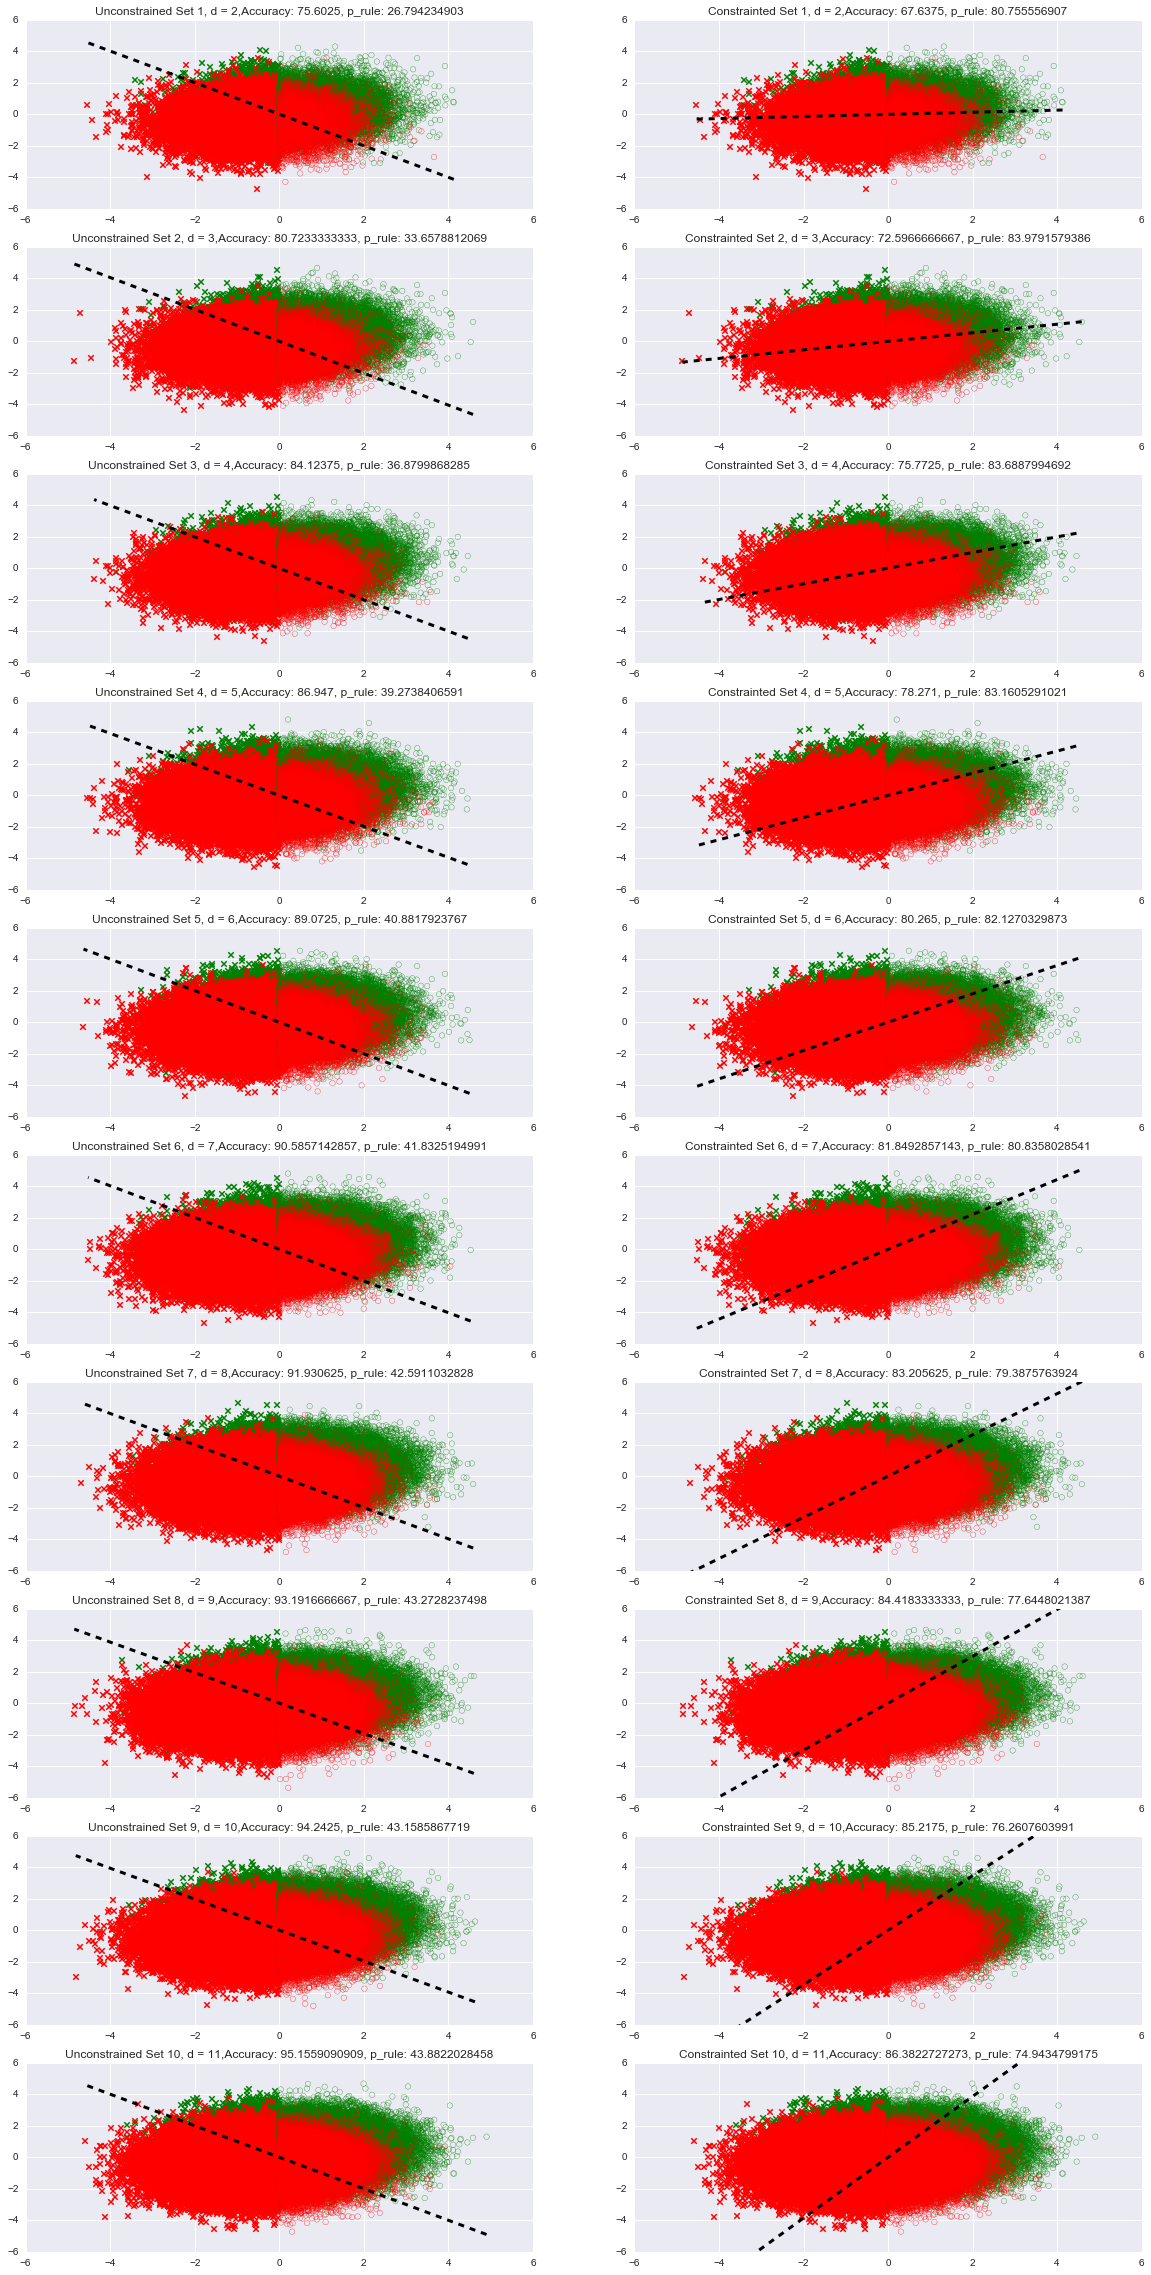

In [26]:
# The function just increases the number of elements, features, which are normaly (gaussian distribution) distributed.
# I expect the behavior described above not to continue for values over 5.
# Because, for instance, the accuracy losses calculated in part b actually increases, with some decreasing fluctuations.
# The algorithm generates more random features and increases the "mass" of subjects, which will somehow decrease the 
# accuracy, because they are so many that they would not be able to mantain the proportion for constrained data sets.
# And also because the "mass" subjects will only increase the accuracy for unconstrained classifications, with a
# result of increasing the loss of accuracy.
fig, ax = plt.subplots(nrows=10, ncols=2,figsize=(20,40))
for d in range(2,12):
    r = d - 1 #row
    axUnpro = ax[r - 1][0]
    axPro = ax[r - 1][1]
    X, y, x_sensitive = get_dataset(d)
    w, p_rule, accuracy = fd.train(X, y, x_sensitive,-1) 
    fd.plot(axUnpro)
    axUnpro.set_title("Unconstrained Set %s, d = %s,Accuracy: %s, p_rule: %s"%(r,d,accuracy,p_rule))
    axUnpro.set_xlim(-6,6)
    axUnpro.set_ylim(-6,6)
    w, p_rule, accuracy = fd.train(X, y, x_sensitive,0.05) 
    fd.plot(axPro)
    axPro.set_title("Constrainted Set %s, d = %s,Accuracy: %s, p_rule: %s"%(r,d,accuracy,p_rule))
    axPro.set_xlim(-6,6)
    axPro.set_ylim(-6,6)

# Problem 2  [10 points]

Read the following review by Barocas and Selbst (or as much of the review as you find interesting):

http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2477899

Answer the following questions on the basis of what you've read.

# part a)

Consider the logic underlying the "fairness aware" classifier we explored in the previous problem. Consider the principle of nondiscrimination versus the principle of antisubordination. Which (if any) of the two principles is more in line with the approach taken by the algorithm? Why?

The antisubordination principle is more inline with the approach taken by the algorithm, Because according to the reading, both principles are very simmilar, but not identical, antisubordination principle considers the "membership" to a class as a feature in order to train a model and according to the algorithm, it is included in the parameters.

# part b)

Consider the "fairness aware" classifier we explored in the previous problem. In itself does it offer a solution to the problem of "masking" as described in the review?

According to the review, access to the "membership" to a class would mask intentionally discrimination, so in order to proceed without this, the classifier in the previous problem itself does not offer a solution to the problem of "masking".

<br><br>

# Problem 3  [5 points]

Consider the following illustration of a dataset in which the positive target labels are marked with plus signs, the green points constitute the non-protected class, and the blue points constitute the protected class. The distribution of the non-protected class is illustrated on the left, the distribution of the protected class is illustrated in the middle, and the graphic on the right shows the combined dataset.

<img src="dataset.png">

Consider applying the "fairness aware" classifier in Problem 1 to the combined dataset, imposing fairness constraints such that the four-fifths rule is satisfied. Do you expect the loss of accuracy as you go from the unconstrained to the constrained classifier to be large or small? Why?


<br><br>

## Answer
I expect that the loss of accuracy as I go from the unconstrained to the constrained classifier to be large. Because there are significant less protected subjects than protected ones. So, four-fifths rule is fulfilled if the ratio of the positive marked protected subjects over the positive marked non-protected class is over 80% (four-fifths). But in order to fulfill that rule, in this example, the most of the total protected subjects must be positively classified, losing accuracy.

# Problem 4  [15 points]
#### (This is question 2.2 from Dunning's book)

In a study of the effect of police presence on the incidence of crime, Di Tella and Schargrodsky (2004) write:

“Following a terrorist attack on the main Jewish center in Buenos Aires, Argentina, in July
1994, all Jewish institutions received police protection… Because the geographical
distribution of these institutions can be presumed to be exogenous in a crime regression, this hideous event constitutes a natural experiment.”

The authors find that blocks which were allocated extra police forces due to the presence of a Jewish institution experienced lower motor vehicle theft rates.  The control group consists of blocks in the same neighborhoods that do not have Jewish institutions.

Answer the following three questions __in at least 6-10 sentences__.

### part a) 

What do the authors mean by “presumed exogenous in a crime regression” and what is the relationship to as-if random assignment? 

The authors mean by "presumed exogenous in a crime regression" as an independent "event" with respect to crime. In other words, Jewish institutions in Buenos Aires were randomly distributed in the city. This also means that, even if they were random, there is no "coincidental" regression with crime in its distribution. It can also be understood that the other blocks are also randomly distributed, so they could work as a perfect control group.

 
### part b) 
What are some potential threats to as-if random assignment?  [give at least two examples of potential threats]

One potential threat is that the autor didn't took in consideration that there are more blocks without a jewish institution than with them. This is because presumabily the city is not full of jewish institutions.

Other potential threat is that, the event could mark a point in time in which people are most alert close to jewish insitutions once the attack took place. So, even if police were not allocated there, it would be expected that anyhow there is more control over this places or at least more threat of attack in blocks close to jewish institutions, and this would reduce the risk of theft.

### part c) 
How might these threats be evaluated empirically?

This should be evaluated taking more features to take in consideration, in order to get rid of the first threat.
What other polices forces do is to run undercover police force, that would ensure the place, without anyone to notice it. This could be a good way to get rid of the second thread.

<br><br><br><br>

# Problem 5  [45 points]
Consider the Titanic dataset below

In [2]:
data=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/Bonus/titanic3.csv");
print("Here are the first three rows:")
data.iloc[0:3,:]

Here are the first three rows:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Take Data as numeric
Y = data['survived']
X = data[['age', 'sex', 'pclass', 'sibsp', 'parch']]
X['sex'] = X['sex'].apply(lambda x: 1 if x=='male' else 0)

/Users/arp504/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
IsNull = (pd.isnull(X['age']))
for i in range(0,len(IsNull)):
    if IsNull[i]:
        X['age'][i] = -1

/Users/arp504/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/arp504/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#Data Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=1)

## Data dictionary
NAME: titanic3<br>
SIZE: 1309 Passengers, 14 Variables<br><br>

VARIABLE DESCRIPTIONS<br>
Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) <br>
survival: Survival (0 = No; 1 = Yes)<br>
name: Name<br>
sex: Sex<br>
age: Age<br>
sibsp: Number of Siblings/Spouses Aboard<br>
parch: Number of Parents/Children Aboard<br>
ticket: Ticket Number<br>
fare: Passenger Fare (British pound)<br>
cabin: Cabin<br>
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
boat: Lifeboat<br>
body: Body Identification Number<br>
home.dest: Home/Destination

# part a) [30 points]

Your goal is to train a classifier for the binary attribute “survival" using age, sex, pclass, sibsp, and parch as features. You will do so using three different machine learning techniques:

i) Naive Bayes Classification. [10 points]

ii) Support Vector Machine. Try a linear SVM with soft margins as well as kernel SVM with polynomial and Gaussian kernels. Make sure to use a validation set to choose hyperparameters for each model where applicable. [10 points]

iii) Random Forest Classification. [10 points]

For each of the three models report out-of-sample accuracy--in order to do so, you will of course need to split the dataset into a training dataset and a test dataset.

In [20]:
#I)
nbc = GaussianNB()
nbc.fit(X_train, Y_train)
Y_pred = nbc.predict(X_test)

accuracy = sum(Y_pred == Y_test)/len(Y_test)
print ("Naive Bayes Classification Accuracy: %0.2f%%" % (100 * accuracy))

#II)
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

accuracy = sum(Y_pred == Y_test)/len(Y_test)
print ("Soft Margins SVM Accuracy: %0.2f%%" % (100 * accuracy))

svc = SVC(kernel='poly', max_iter=-1, tol=.1, degree=3)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

accuracy = sum(Y_pred == Y_test)/len(Y_test)
print ("Polynomial SVM Accuracy: %0.2f%%" % (100 * accuracy))

svc = SVC(kernel='rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

accuracy = sum(Y_pred == Y_test)/len(Y_test)
print ("Gaussian SVM Accuracy: %0.2f%%" % (100 * accuracy))

#III)

rfc = RandomForestClassifier(n_jobs=-1, n_estimators=1000)
rfc = rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

accuracy = sum(Y_pred == Y_test)/len(Y_test)
print ("Random Forest Classifier Accuracy: %0.2f%%" % (100 * accuracy))


Naive Bayes Classification Accuracy: 76.34%
Soft Margins SVM Accuracy: 80.92%
Polynomial SVM Accuracy: 80.92%
Gaussian SVM Accuracy: 82.44%
Random Forest Classifier Accuracy: 80.92%


# part b)  [15 points]

Repeat the exercise in part a, this time using cross validation. Report the mean accuracy for each model after doing 10 random splits of the data into train and test sets.

In [19]:
#I)
nbc = GaussianNB()
scores = cross_val_score(nbc, X, Y, cv=10, scoring='accuracy')

print ("Naive Bayes Classification Mean Accuracy: %0.2f%%" % (100 * scores.mean()))

#II)
svc = SVC(kernel='linear')
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')

print ("Soft Margins SVM Mean Accuracy: %0.2f%%" % (100 * scores.mean()))

svc = SVC(kernel='poly', max_iter=-1, tol=.1, degree=3)
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')

print ("Polynomial SVM Mean Accuracy: %0.2f%%" % (100 * scores.mean()))

svc = SVC(kernel='rbf')
scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')

print ("Gaussian SVM Mean Accuracy: %0.2f%%" % (100 * scores.mean()))

#III)

rfc = RandomForestClassifier(n_jobs=-1, n_estimators=1000)
scores = cross_val_score(rfc, X, Y, cv=10, scoring='accuracy')

print ("Random Forest Classifier Mean Accuracy: %0.2f%%" % (100 * scores.mean()))



Naive Bayes Classification Mean Accuracy: 73.42%
Soft Margins SVM Mean Accuracy: 78.00%
Polynomial SVM Mean Accuracy: 73.34%
Gaussian SVM Mean Accuracy: 76.70%
Random Forest Classifier Mean Accuracy: 73.56%
